# Data Cleaning & Exploratory Data Analysis

* Importing the necessary libraries:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import wordcloud

* Reading the data into dataframes:

In [3]:
anime = pd.read_csv('data/raw/anime.csv')
rating = pd.read_csv('data/raw/rating.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.shape

(12294, 7)

In [6]:
rating.shape

(7813737, 3)

* Statistical summary of the numerical columns:

In [7]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


* Checking data types of the columns:

In [8]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

* Checking for missing values:

In [9]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

* Dropping null valued entries from the dataset:

In [10]:
anime.dropna(inplace=True)

* Anime name uses Japanese characters, so we will transform them to English characters:

In [12]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime['name'] = anime['name'].apply(text_cleaning)

In [13]:
anime["name"].head()

0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                             Gintama
Name: name, dtype: object

* Let's see the types of Animes:

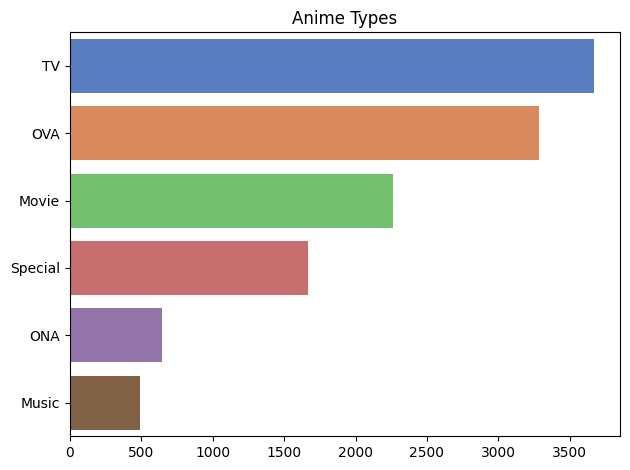

In [16]:
type_count = anime['type'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Anime Types')

plt.tight_layout()
plt.show()

* We are only interested in TV Series, Movies and OVA's, so we will drop the rest:

In [17]:
# drop ONA, Special, and Music
anime = anime[anime['type'].isin(['TV', 'Movie', 'OVA'])]

In [18]:
anime.type.value_counts()

TV       3668
OVA      3284
Movie    2259
Name: type, dtype: int64

* Visualizing the Genres:

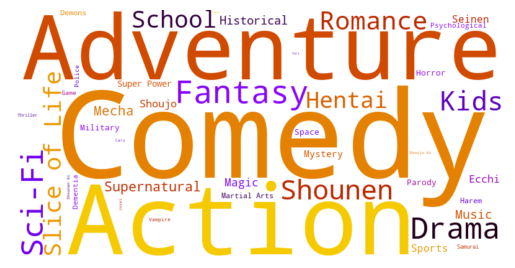

In [15]:
from collections import defaultdict

all_genres = defaultdict(int)

for genres in anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Let's inspect the highest rated Animes:

In [23]:
# sort animes by rating and return top 10
top_rated = anime[['name', 'rating', 'members', 'type']].sort_values(by='rating', ascending=False).query('members>10000')[:10]
top_rated

,name,rating,members,type
0,Kimi no Na wa.,9.37,200630,Movie
1,Fullmetal Alchemist: Brotherhood,9.26,793665,TV
2,Gintama°,9.25,114262,TV
3,Steins;Gate,9.17,673572,TV
4,Gintama,9.16,151266,TV
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15,93351,TV
6,Hunter x Hunter (2011),9.13,425855,TV
7,Ginga Eiyuu Densetsu,9.11,80679,OVA
9,Gintama: Enchousen,9.11,81109,TV
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10,72534,Movie


* This time let's sort by the number of community members:

In [24]:
# sort animes by members and return top 10
most_watched = anime[['name', 'rating', 'members', 'type']].sort_values(by='members', ascending=False)[:10]
most_watched

,name,rating,members,type
40,Death Note,8.71,1013917,TV
86,Shingeki no Kyojin,8.54,896229,TV
804,Sword Art Online,7.83,893100,TV
1,Fullmetal Alchemist: Brotherhood,9.26,793665,TV
159,Angel Beats!,8.39,717796,TV
19,Code Geass: Hangyaku no Lelouch,8.83,715151,TV
841,Naruto,7.81,683297,TV
3,Steins;Gate,9.17,673572,TV
445,Mirai Nikki (TV),8.07,657190,TV
131,Toradora!,8.45,633817,TV


* Distribution of the ratings:

Since -1 refers to animes that are watched but not rated, we will assing them NA values as rating.

In [25]:
rating["rating"].isna().sum()

0

In [26]:
# convert -1 ratings to NA
rating.rating.replace({-1: np.nan}, inplace=True)
rating.rating.isna().sum()

1476496

Text(0.5, 1.0, 'Rating of users')

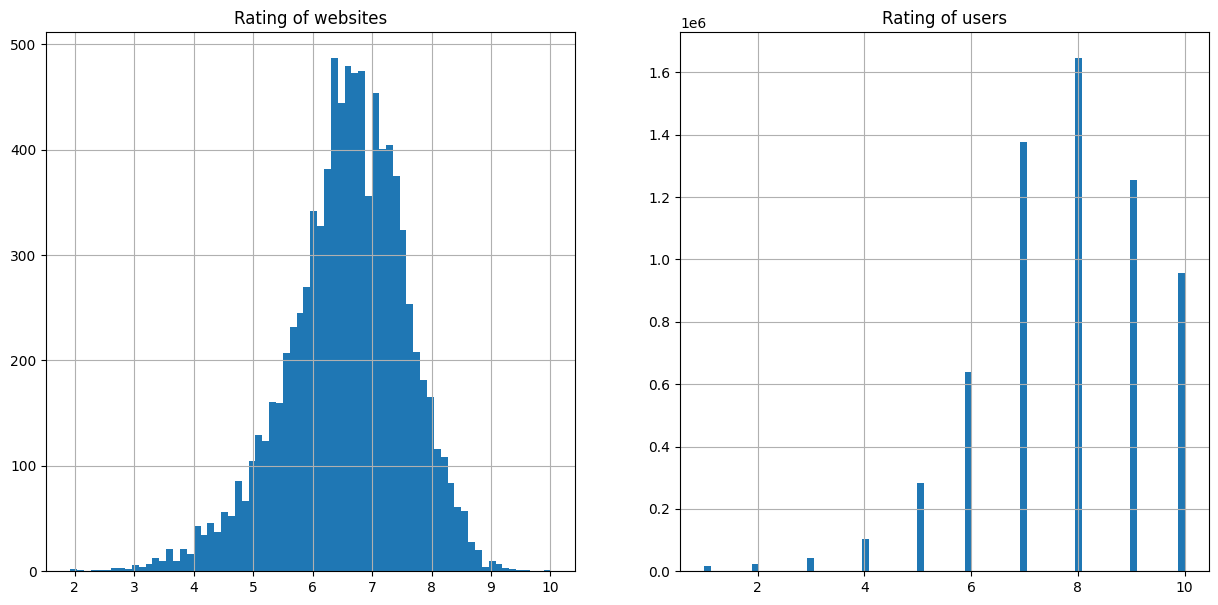

In [28]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
rating['rating'].hist(bins=70)
plt.title("Rating of users")

For websites rating is centered around 7 and for users it is around 8.

In [11]:
rating["rating"].isna().sum()

0

* Let's see the distribution of the number of ratings per user:

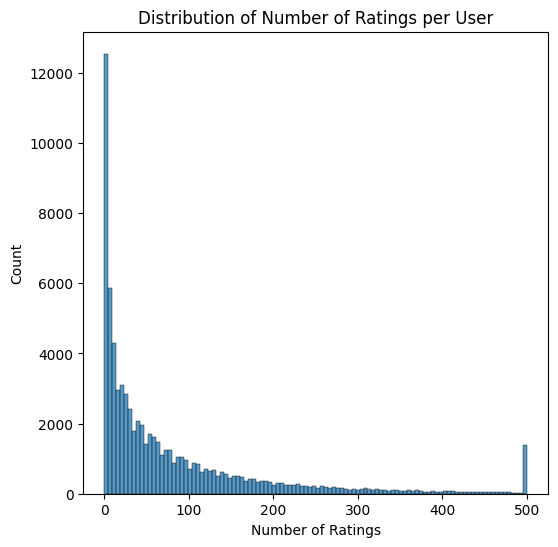

In [29]:
# Plot the distribution of number of ratings per user limit to 500
plt.figure(figsize=(6, 6))
sns.histplot(rating.groupby('user_id').count().rating.clip(upper=500))
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

Most of the users rate less than 100 animes.

* Let's save the cleaned data:

In [32]:
# save cleaned anime and rating data under ./data/cleaned folder
anime.to_csv('./data/cleaned/anime.csv', index=False)
rating.to_csv('./data/cleaned/rating.csv', index=False)